# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Clara Ibereina Evivania
- **Email:** mc002d5x0774@student.devacademy.id
- **ID Dicoding:** MC002D5X0774

## Menentukan Pertanyaan Bisnis

- Apakah terdapat hubungan antara durasi pengiriman dengan tingkat kepuasan pelanggan?
- Apakah terdapat pola khusus mengenai jumlah pembelian produk pada waktu tertentu?

## Import Semua Packages/Library yang Digunakan

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
customersdf = pd.read_csv('/content/customers_dataset.csv')
ordersdf = pd.read_csv('/content/orders_dataset.csv')
geolocationdf = pd.read_csv('/content/geolocation_dataset.csv')
orderreviewdf = pd.read_csv('/content/order_reviews_dataset.csv')
orderitemdf = pd.read_csv('/content/order_items_dataset.csv')
productdf = pd.read_csv('/content/products_dataset.csv')
customer_order_df= pd.merge(
    left = ordersdf,
    right = customersdf,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)
customer_order_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [16]:
review_df = pd.merge(
    left = customer_order_df,
    right = orderreviewdf,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
review_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,e262b3f92d1ce917aa412a9406cf61a6,5.0,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [17]:
georeview_df = pd.merge(
    left = review_df,
    right =geolocationdf,
    how = 'left',
    left_on = 'customer_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix'
)
georeview_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,3149.0,-23.580054,-46.586673,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15169388,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,...,5.0,NaN,NaN,2018-03-17 00:00:00,2018-03-17 16:33:31,83750.0,-25.762064,-49.720313,lapa,PR
15169389,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,...,5.0,NaN,NaN,2018-03-17 00:00:00,2018-03-17 16:33:31,83750.0,-25.758551,-49.722177,lapa,PR
15169390,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,...,5.0,NaN,NaN,2018-03-17 00:00:00,2018-03-17 16:33:31,83750.0,-25.757450,-49.713800,lapa,PR
15169391,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,...,5.0,NaN,NaN,2018-03-17 00:00:00,2018-03-17 16:33:31,83750.0,-25.774218,-49.737533,lapa,PR


In [18]:
order_items_df = pd.merge(
    left = orderitemdf,
    right = productdf,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [19]:
order_time_df = pd.merge(
    left = order_items_df,
    right = ordersdf,
    how ='left',
    left_on = 'order_id',
    right_on = 'order_id'
)
order_time_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,89.0,15.0,40.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,45.0,26.0,38.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,21.0,24.0,19.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,20.0,20.0,20.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


**Insight:**
- Dalam sekali transaksi, seorang customer dapat membeli produk yang sama dengan jumlah yang banyak.
- Terdapat peningkatan pemesanan produk pada waktu tertentu.

### Assessing Data

In [20]:
georeview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15169393 entries, 0 to 15169392
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   customer_unique_id             object 
 9   customer_zip_code_prefix       int64  
 10  customer_city                  object 
 11  customer_state                 object 
 12  review_id                      object 
 13  review_score                   float64
 14  review_comment_title           object 
 15  review_comment_message         object 
 16  review_creation_date           object 
 17  review_answer_timestamp        object 
 18  

In [21]:
georeview_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,25359
order_delivered_carrier_date,274155
order_delivered_customer_date,434155
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [22]:
print('Jumlah duplikasi:',georeview_df.duplicated().sum())

Jumlah duplikasi: 4783853


In [23]:
order_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [24]:
order_time_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,1603
product_name_lenght,1603
product_description_lenght,1603


In [25]:
print('Jumlah duplikasi:',order_time_df.duplicated().sum())

Jumlah duplikasi: 0


**Insight:**
- Pada dataset geolotical dan order time, terdapat beberapa missing values
- Pada dataset geolotical terdapat duplikasi sebanyak 4783853
- Pada dataset order time, terdapat kolom yang berisi tanggal, tetapi format datanya tidak dalam bentuk timestamp
- Pada dataset geolotical, kolom review_comment_title terlalu banyak yang kosong

### Cleaning Data

In [26]:
georeview_df['order_approved_at']=pd.to_datetime(georeview_df['order_approved_at'])
georeview_df['order_delivered_carrier_date']=pd.to_datetime(georeview_df['order_delivered_carrier_date'])
georeview_df['order_delivered_customer_date']=pd.to_datetime(georeview_df['order_delivered_customer_date'])
print(georeview_df.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date                     object
review_answer_timestamp                  object
geolocation_zip_code_prefix             float64
geolocation_lat                         float64
geolocation_lng                         

In [27]:
order_time_df['order_approved_at']=pd.to_datetime(georeview_df['order_approved_at'])
order_time_df['order_delivered_carrier_date']=pd.to_datetime(georeview_df['order_delivered_carrier_date'])
order_time_df['order_delivered_customer_date']=pd.to_datetime(georeview_df['order_delivered_customer_date'])
order_time_df['order_purchase_timestamp']=pd.to_datetime(georeview_df['order_purchase_timestamp'])
print(order_time_df.dtypes)

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetim

In [28]:
order_time_df['order_approved_at'].fillna(order_time_df['order_approved_at'].median(),inplace=True)
order_time_df['order_delivered_carrier_date'].fillna(order_time_df['order_delivered_carrier_date'].median(),inplace=True)
order_time_df['order_delivered_customer_date'].fillna(order_time_df['order_delivered_customer_date'].median(),inplace=True)
order_time_df['order_purchase_timestamp']= order_time_df['order_purchase_timestamp'].fillna(order_time_df['order_approved_at'])

georeview_df['geolocation_lat'] = geolocationdf.groupby('geolocation_zip_code_prefix')['geolocation_lat'].transform(lambda x: x.fillna(x.mean()))
georeview_df['geolocation_lng'] = geolocationdf.groupby('geolocation_zip_code_prefix')['geolocation_lng'].transform(lambda x: x.fillna(x.mean()))
georeview_df['review_score'].fillna(georeview_df['review_score'].median(),inplace=True)
georeview_df['order_approved_at'].fillna(order_time_df['order_approved_at'].median(),inplace=True)
georeview_df['order_delivered_carrier_date'].fillna(order_time_df['order_delivered_carrier_date'].median(),inplace=True)
georeview_df['order_delivered_customer_date'].fillna(order_time_df['order_delivered_customer_date'].median(),inplace=True)

print(order_time_df.isna().sum())
print(georeview_df.isna().sum())

<ipython-input-28-95ff6b162848>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_time_df['order_approved_at'].fillna(order_time_df['order_approved_at'].median(),inplace=True)
<ipython-input-28-95ff6b162848>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64
order_id                                0
customer_id                             0
order_status                            0
order_purchase_timestamp 

In [29]:
order_time_df.drop(columns=[
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
],inplace=True)

In [30]:
print(order_time_df.isna().sum())

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [31]:
georeview_df['review_comment_title'].fillna('No Comment',inplace = True)
georeview_df['review_comment_message'].fillna('No Comment',inplace = True)
georeview_df = georeview_df.dropna(subset=['review_id'])
georeview_df['geolocation_zip_code_prefix'] = georeview_df.groupby('customer_id')['geolocation_zip_code_prefix'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Tidak Diketahui'))
georeview_df['geolocation_city'] = georeview_df.groupby('geolocation_zip_code_prefix')['geolocation_city'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Tidak Diketahui'))
georeview_df['geolocation_state'] = georeview_df.groupby('geolocation_zip_code_prefix')['geolocation_state'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Tidak Diketahui'))
georeview_df['geolocation_lat'] = georeview_df.groupby('geolocation_zip_code_prefix')['geolocation_lat'].transform(lambda x: x.fillna(x.mean()))
georeview_df['geolocation_lng'] = georeview_df.groupby('geolocation_zip_code_prefix')['geolocation_lng'].transform(lambda x: x.fillna(x.mean()))
print(georeview_df.isna().sum())

<ipython-input-31-ba1f2a36b068>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  georeview_df['review_comment_title'].fillna('No Comment',inplace = True)
<ipython-input-31-ba1f2a36b068>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

order_id                               0
customer_id                            0
order_status                           0
order_purchase_timestamp               0
order_approved_at                      0
order_delivered_carrier_date           0
order_delivered_customer_date          0
order_estimated_delivery_date          0
customer_unique_id                     0
customer_zip_code_prefix               0
customer_city                          0
customer_state                         0
review_id                              0
review_score                           0
review_comment_title                   0
review_comment_message                 0
review_creation_date                   0
review_answer_timestamp                0
geolocation_zip_code_prefix            0
geolocation_lat                  3569166
geolocation_lng                  3569166
geolocation_city                       0
geolocation_state                      0
dtype: int64


In [32]:
georeview_df.drop(columns=[
    'geolocation_lat',
    'geolocation_lng'
],inplace=True)
print(georeview_df.isna().sum())

<ipython-input-32-4dbef8adec10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georeview_df.drop(columns=[


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
geolocation_zip_code_prefix      0
geolocation_city                 0
geolocation_state                0
dtype: int64


In [33]:
georeview_df.drop_duplicates(inplace=True)
print('Jumlah duplikasi:',georeview_df.duplicated().sum())

<ipython-input-33-ff6458af6306>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georeview_df.drop_duplicates(inplace=True)


Jumlah duplikasi: 0


**Insight:**
- Data dalam bentuk waktu harus dikonversi ke dalam bentuk time stamp sehingga tidak terjadi kesalahan dalam proses analisis data.
- Terdapat beberapa customer yang tidak memberikan review comment, sehingga peniliaian dapat dilakukan dengan review score.
- Terdapat lokasi customer yang hilang

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
georeview_df.groupby(by=['customer_state']).agg({
    'customer_zip_code_prefix':'nunique',
    'review_score':'mean',
}).sort_values(by='review_score',ascending=False)

,customer_zip_code_prefix,review_score
customer_state,,
AP,18,4.198347
SP,5586,4.174689
PR,861,4.165882
AM,55,4.165563
RS,875,4.143799
MG,1348,4.136239
TO,96,4.116848
MS,186,4.095037
RN,175,4.093697


In [35]:
georeview_df['durasi_pengiriman'] = (georeview_df['order_delivered_customer_date']
                                     - georeview_df['order_approved_at']).dt.days
georeview_df['kategori_jarak'] = georeview_df['durasi_pengiriman'].apply(
    lambda x: 'jauh' if x>3 else 'dekat')
review_sum = georeview_df[['customer_state','customer_zip_code_prefix','review_score',
                               'durasi_pengiriman','kategori_jarak','customer_id']].sort_values(by='review_score',ascending=False)
review_sum

<ipython-input-35-5188f6fd8d25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georeview_df['durasi_pengiriman'] = (georeview_df['order_delivered_customer_date']
<ipython-input-35-5188f6fd8d25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  georeview_df['kategori_jarak'] = georeview_df['durasi_pengiriman'].apply(


,customer_state,customer_zip_code_prefix,review_score,durasi_pengiriman,kategori_jarak,customer_id
15169248,PR,83750,5.0,7,jauh,edb027a75a1449115f6b43211ae02a24
11756585,SP,13023,5.0,2,dekat,3ada6c72db8b9159deef90a02a023066
6405175,SP,1222,5.0,6,jauh,933bab0e42c2ca412e361796ba65cd24
6405160,SP,5059,5.0,2,dekat,e54901a3daa7ac6cf4ddc39ffe36f174
11758151,SP,12606,5.0,3,dekat,9beab01fa571e9e5b47c42573490a67c
...,...,...,...,...,...,...
11852448,SP,4473,1.0,5,jauh,759493fb6369860c506ab5adf25eb6c1
7839483,SC,88220,1.0,11,jauh,fa4806deb2b4135ae3708a87c6279302
13959718,MG,37470,1.0,11,jauh,75aa0f7b76847ca2b890f2e844a4df54
13959719,MG,37470,1.0,11,jauh,75aa0f7b76847ca2b890f2e844a4df54


In [36]:
jarak_jauh = (georeview_df[georeview_df['kategori_jarak']=='jauh']
              .groupby('review_score')).agg(total_review=('review_score','count')).reset_index().sort_values(by='review_score',ascending=False)
jarak_jauh

,review_score,total_review
4,5.0,73754
3,4.0,25873
2,3.0,11126
1,2.0,4201
0,1.0,15094


In [37]:
jarak_dekat = (georeview_df[georeview_df['kategori_jarak']=='dekat']
              .groupby('review_score')).agg(total_review=('review_score','count')).reset_index().sort_values(by='review_score',ascending=False)
jarak_dekat

,review_score,total_review
4,5.0,12238
3,4.0,2954
2,3.0,1097
1,2.0,502
0,1.0,1775


In [38]:
order_time_df['tanggal_order']=order_time_df['order_purchase_timestamp'].dt.date
order_time_df['perbulan']=order_time_df['order_purchase_timestamp'].dt.to_period("M")
order_time_df['perhari']=order_time_df['order_purchase_timestamp'].dt.day_name()

trend_bulanan = order_time_df.groupby('perbulan').agg(jumlah_pesanan=('order_id','count')).reset_index().astype(str)
trend_perhari = order_time_df.groupby('perhari').agg(jumlah_pesanan=('order_id','count')).reset_index()

urutan_hari= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trend_perhari = trend_perhari.set_index('perhari').reindex(urutan_hari).reset_index()
print(trend_bulanan)
print(trend_perhari)

   perbulan jumlah_pesanan
0   2016-10            241
1   2017-01           1669
2   2017-02           1658
3   2017-03           1581
4   2017-04           2634
5   2017-05           5575
6   2017-06           1880
7   2017-07           5034
8   2017-08           3432
9   2017-09           4807
10  2017-10           3983
11  2017-11          11327
12  2017-12           5531
13  2018-01           9245
14  2018-02           8413
15  2018-03           7027
16  2018-04           6556
17  2018-05           6494
18  2018-06           8950
19  2018-07           9503
20  2018-08           7110
     perhari  jumlah_pesanan
0     Monday           18822
1    Tuesday           15014
2  Wednesday           15715
3   Thursday           19772
4     Friday           14213
5   Saturday           13974
6     Sunday           15140


In [39]:
trend_perhari['jumlah_pesanan'].describe()

,jumlah_pesanan
count,7.000000
mean,16092.857143
std,2281.168445
min,13974.000000
25%,14613.500000
50%,15140.000000
75%,17268.500000
max,19772.000000


In [40]:
trend_bulanan['jumlah_pesanan'].describe()

,jumlah_pesanan
count,21
unique,21
top,241
freq,1


In [41]:
trend = order_time_df.groupby(['perbulan','order_status'])['order_id'].count().reset_index()
trend

,perbulan,order_status,order_id
0,2016-10,canceled,2
1,2016-10,delivered,238
2,2016-10,shipped,1
3,2017-01,canceled,8
4,2017-01,delivered,1646
...,...,...,...
106,2018-08,canceled,32
107,2018-08,delivered,6969
108,2018-08,invoiced,26
109,2018-08,processing,17


**Insight:**
- Jarak tidak mempengaruhi tingkat kepuasan customer.
- Pemesanan terbanyak terjadi pada 2017-11 dengan total pemesanan sebanyak 11327. Sementara itu, total pemesanan paling sedikit terjadi pada 2016-10 dengan pemesanan sebanyak 241.
- Hari dengan jumlah pesanan terbanyak terjadi di hari Kamis dengan total pemesanan sebanyak 19772. Sementara itu, hari dengan jumlah pemesanan paling sedikit adalah Sabtu dengan total pemesanan sebanyak 13974.
- Bulan pertama di tahun 2018 merupakan bulan terbanyak yang melakukan pengiriman, dibatalkan, dan diproses.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

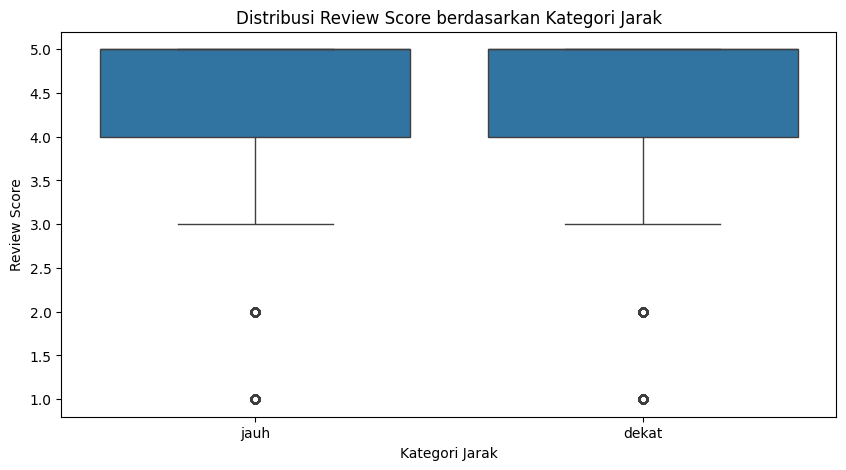

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x=georeview_df['kategori_jarak'],y=georeview_df['review_score'])
plt.title('Distribusi Review Score berdasarkan Kategori Jarak')
plt.xlabel('Kategori Jarak')
plt.ylabel('Review Score')
plt.show()

Berdasarkan grafik boxplot tersebut, dapat dilihat bahwa baik jarak jauh maupun dekat memiliki median review score yang sama, yaitu sekitar 5. Hal ini menunjukkan jarak tidak berpengaruh secara langsung terhadap kepuasan customer. Lalu, IQR keduanya hampir serupa, artinya variasi tingkat kepuasan jarak jauh dan dekat adalah serupa. Lalu, terdapat outlier di nilai 1 dan 2 yang berarti ada customer yang memberikan nilai 1 dan 2 tanpa terpengaruh jarak. Hal ini menunjukkan bahwa ada faktor lain yang mempengaruhi tingkat kepuasan pelanggan, selain jarak.

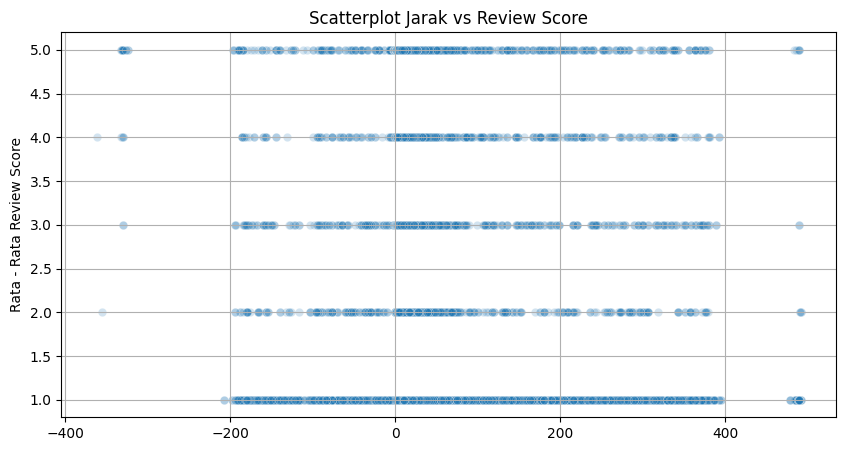

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=georeview_df['durasi_pengiriman'],y=georeview_df['review_score'], alpha = 0.2)
plt.title('Scatterplot Jarak vs Review Score')
plt.xlabel('')
plt.ylabel('Rata - Rata Review Score')
plt.grid(True)
plt.show()

Berdasarkan grafik, dapat dilihat bahwa jarak dan tingkat kepuasan pelanggan tidak berhubungan. Hal ini menunjukkan bahwa pelanggan dapat memberikan rating berdasarkan pertimbangan lainnya, tanpa mempertimbangkan jarak jauh atau dekat.

### Pertanyaan 2:

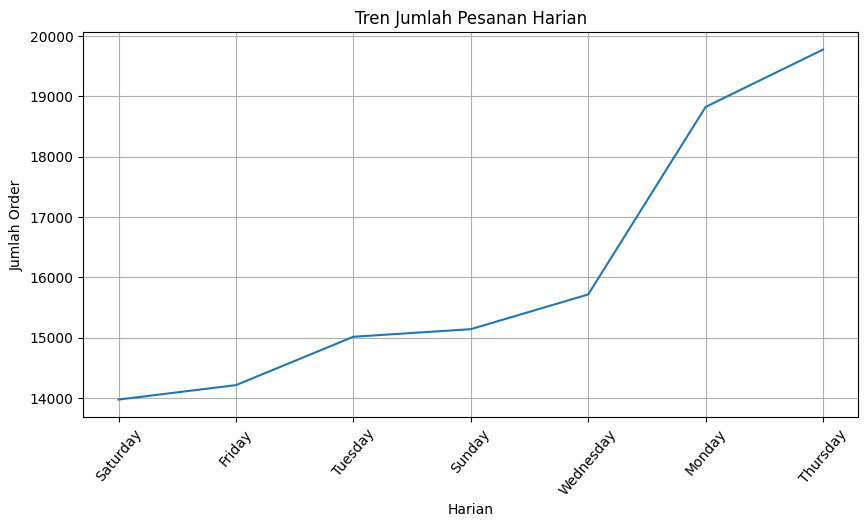

In [44]:
trend_perhari_urutan = trend_perhari.sort_values(by='jumlah_pesanan',ascending=True)
plt.figure(figsize=(10,5))
sns.lineplot(data=trend_perhari_urutan, x='perhari', y='jumlah_pesanan')
plt.title('Tren Jumlah Pesanan Harian')
plt.xticks(rotation=50)
plt.xlabel('Harian')
plt.ylabel('Jumlah Order')
plt.grid()


Berdasarkan grafik, dapat dilihat bahwa penjualan terbanyak terjadi pada hari Senin. Sementara itu, penjualan terendah terjadi pada hari minggu.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '1'),
  Text(0, 1.5, '2'),
  Text(0, 2.5, '3'),
  Text(0, 3.5, '4'),
  Text(0, 4.5, '5'),
  Text(0, 5.5, '6'),
  Text(0, 6.5, '7'),
  Text(0, 7.5, '8'),
  Text(0, 8.5, '9'),
  Text(0, 9.5, '10'),
  Text(0, 10.5, '11'),
  Text(0, 11.5, '12')])

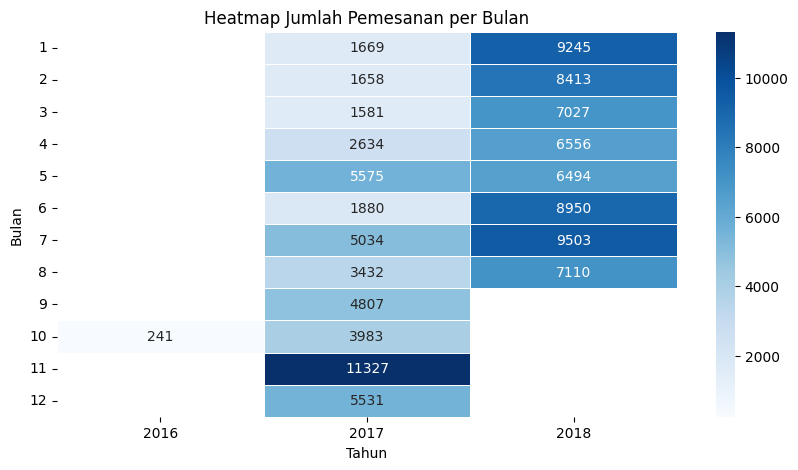

In [45]:
trend_bulanan['perbulan']=pd.to_datetime(trend_bulanan['perbulan'])
trend_bulanan['tahun'] = trend_bulanan['perbulan'].dt.year
trend_bulanan['bulan'] = trend_bulanan['perbulan'].dt.month
trend_bulanan['jumlah_pesanan']=pd.to_numeric(trend_bulanan['jumlah_pesanan'])
heatmapdf = trend_bulanan.pivot_table(index='bulan',columns='tahun',values='jumlah_pesanan',aggfunc='sum')
plt.figure(figsize=(10,5))
sns.heatmap(heatmapdf,cmap='Blues',annot=True,fmt='.0f',linewidths=0.5)
plt.title('Heatmap Jumlah Pemesanan per Bulan')
plt.xlabel('Tahun')
plt.ylabel('Bulan')
plt.yticks(rotation=0)

Berdasarkan heatmap, dapat dilihat bahwa penjualan terbayak terjadi pada bulan ke-11 di tahun 2017 dengan transaksi sebanyak 11327. Sementara itu, transaksi paling sedikit terjadi pada bulan ke-10 di tahun 2016 dengan transaksi sebanyak 241.

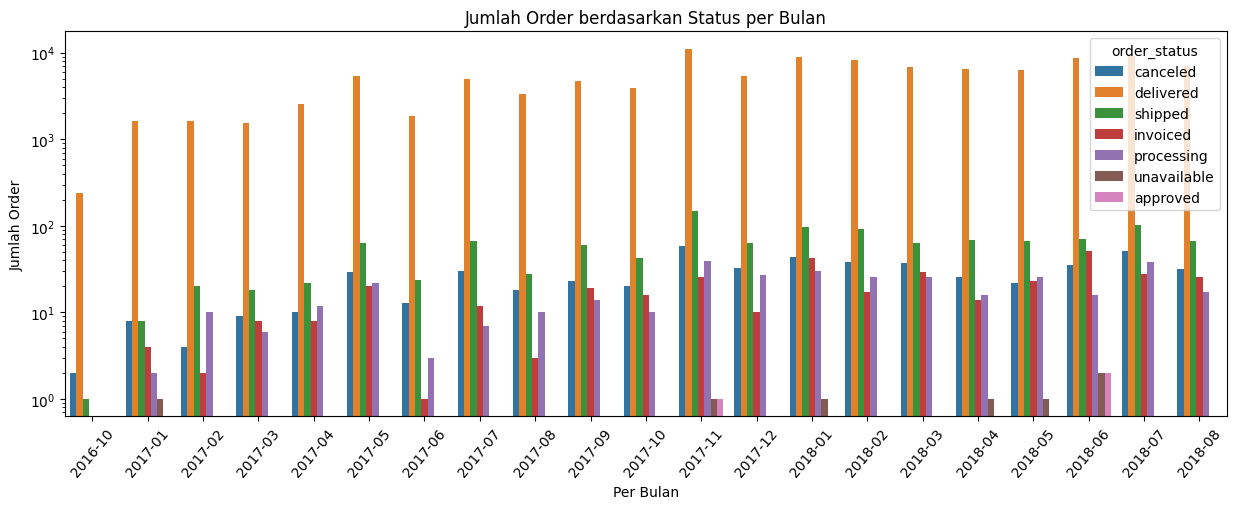

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(data=trend, x='perbulan',y='order_id', hue='order_status')
plt.title('Jumlah Order berdasarkan Status per Bulan')
plt.xlabel('Per Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=50)
plt.yscale('log')
plt.show()

Berdasarkan tren jumlah pemesanan berdasarkan status pemesanan per bulan, dapat dilhat bahwa tren pemesanan paling tinggi terjadi di 2017-11. Sementara itu, tren pemesanan paling rendah terjadi di 2016-10.

**Insight:**
- Jarak pengiriman tidak mempengaruhi kepuasan pelanggan. Banyak pelanggan yang tetap memberikan review tinggi meskipun jarak pengiriman tergolong jauh.
- Berdasarkan hasil analisis, dapat dilihat dari tren pemesanan bahwa pelanggan paling banyak melakukan transaksi di hari Kamis dan paling sedikit di hari Sabtu. Selain itu, transaksi paling banyak terjadi di 2017-11.

## Analisis Lanjutan (Opsional)

## Conclusion

- Jarak tidak memberikan pengaruh secara signifikan terhadap tingkat kepuasan pelanggan. Berdasarkan hasil analisis, terlihat bahwa keduanya tidak berkorelasi. Selain itu, terdapat review score yang rendah pada kondisi jarak jauh dan dekat. Hal ini menunjukkan bahwa terdapat faktor lain yang mempengaruhi tingkat kepuasan pelanggan.
- Berdasarkan hasil analisis, pelanggan paling banyak melakukan transaksi di hari Senin dan paling sedikit di hari Minggu. Selain itu, transaksi dan proses pengiriman paling banyak terjadi di 11-2017 dan paling sedikit di 10-2016.